In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
#from modules.dataloader import get_loaders
from modules.dali_dataloader import get_loader
import torch
import matplotlib.pyplot as plt
from modules.optimizers import optimizer_factory
from modules.lrfinder import LRFinder
from torchvision import models

/usr/local/lib/python3.5/dist-packages/tqdm/autonotebook/__init__.py:18: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [3]:
model = models.resnet50().cuda(0)

In [4]:
loader = get_loader(128, 512, 4, 0, True)

/home/zakirov/datasets/imagenet_2012/raw_data/160/train/


In [5]:
len(loader)

2502

In [6]:
#optim = torch.optim.SGD(model.parameters(), lr=1e-7, momentum=0.9, weight_decay=1e-5)
optim = optimizer_factory('adamw')(model.parameters(), lr=1e-7, weight_decay=1e-5) #momentum=0.9, 
loss = torch.nn.CrossEntropyLoss()

In [7]:
lrfinder = LRFinder(model, optim, loss)
lrfinder.range_test(loader, num_iter=500, end_lr=0.1)


Learning rate search finished. See the graph with {finder_name}.plot()


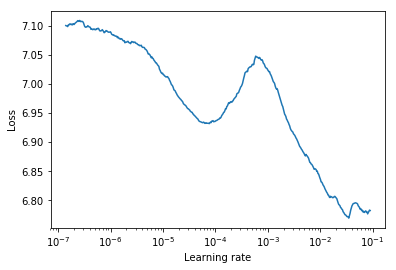

In [8]:
lrfinder.plot()

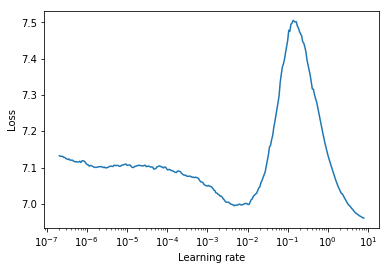

In [27]:
# basic SGD 
lrfinder.plot()

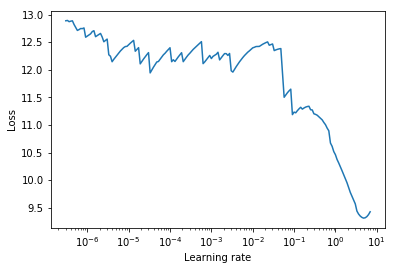

In [17]:
lrfinder.plot()

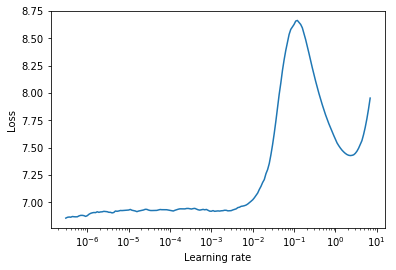

In [15]:
lrfinder.plot()

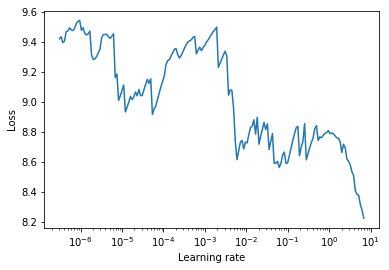

In [11]:
lrfinder.plot()

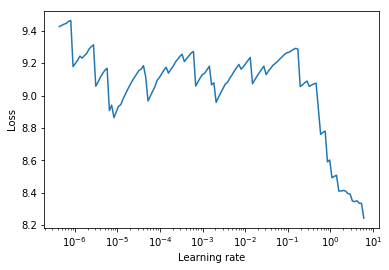

In [9]:
lrfinder.plot()

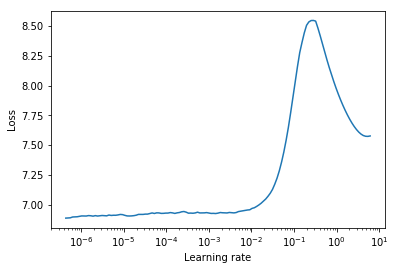

In [36]:
lrfinder.plot()